## Data Preprocessing

In [1]:
#Import llibrary
import pandas as pd

In [3]:
#Load the dataset
logistics_df = pd.read_csv ("smart_logistics_dataset.csv")
logistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1000 non-null   object 
 1   Asset_ID                 1000 non-null   object 
 2   Latitude                 1000 non-null   float64
 3   Longitude                1000 non-null   float64
 4   Inventory_Level          1000 non-null   int64  
 5   Shipment_Status          1000 non-null   object 
 6   Temperature              1000 non-null   float64
 7   Humidity                 1000 non-null   float64
 8   Traffic_Status           1000 non-null   object 
 9   Waiting_Time             1000 non-null   int64  
 10  User_Transaction_Amount  1000 non-null   int64  
 11  User_Purchase_Frequency  1000 non-null   int64  
 12  Logistics_Delay_Reason   737 non-null    object 
 13  Asset_Utilization        1000 non-null   float64
 14  Demand_Forecast          

In [5]:
#2 Convert 'Timestamp' column to datatime
logistics_df['Timestamp'] = pd.to_datetime(logistics_df['Timestamp'])
logistics_df.info() # To check if the change has been effected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                1000 non-null   datetime64[ns]
 1   Asset_ID                 1000 non-null   object        
 2   Latitude                 1000 non-null   float64       
 3   Longitude                1000 non-null   float64       
 4   Inventory_Level          1000 non-null   int64         
 5   Shipment_Status          1000 non-null   object        
 6   Temperature              1000 non-null   float64       
 7   Humidity                 1000 non-null   float64       
 8   Traffic_Status           1000 non-null   object        
 9   Waiting_Time             1000 non-null   int64         
 10  User_Transaction_Amount  1000 non-null   int64         
 11  User_Purchase_Frequency  1000 non-null   int64         
 12  Logistics_Delay_Reason   737 non-nu

In [7]:
#3 Extract time-based features
logistics_df['Hour'] = logistics_df['Timestamp'].dt.hour # Hour of the day
logistics_df['DayOfWeek'] = logistics_df['Timestamp'].dt.day_name() # Day name (e.g., Monday)
logistics_df['Month'] = logistics_df['Timestamp'].dt.month # This will display the month as numbers

In [11]:
#4 Efficiency Ratio (this helps to see how well inventory meets demand)
logistics_df ['Efficiency_Ratio'] = logistics_df['Demand_Forecast']/logistics_df['Inventory_Level']
logistics_df ['Efficiency_Ratio']

0      0.730769
1      0.354379
2      1.368421
3      0.484848
4      0.562500
         ...   
995    0.806818
996    0.567850
997    0.792507
998    0.876812
999    0.898089
Name: Efficiency_Ratio, Length: 1000, dtype: float64

In [13]:
#5 Delay Reason Flag (0 if there is no reason and 1 if there is, like 'Weather', 'Traffic', etc.)
logistics_df['Has_Delay_Reason'] = logistics_df['Logistics_Delay_Reason'].apply(lambda x: 0 if x == 'None' else 1)

In [15]:
#6 Categorize traffic severity for analysis
def traffic_level(x):
    if x == 'Clear':
        return 'Low'
    elif x == 'Detour':
        return 'Medium'
    else:
        return "High"

logistics_df['Traffic_Level'] = logistics_df['Traffic_Status'].apply(traffic_level)
    

In [19]:
#7. Categorize inventory level into 'Low', 'Medium', 'High'
logistics_df['Inventory_Category'] = pd.cut (
    logistics_df['Inventory_Level'],
    bins = [0, 200, 350, 500],
    labels =['Low', 'Medium', 'High']
)

In [21]:
print(logistics_df.head())

            Timestamp  Asset_ID  Latitude  Longitude  Inventory_Level  \
0 2024-03-20 00:11:14   Truck_7  -65.7383    11.2497              390   
1 2024-10-30 07:53:51   Truck_6   22.2748  -131.7086              491   
2 2024-07-29 18:42:48  Truck_10   54.9232    79.5455              190   
3 2024-10-28 00:50:54   Truck_9   42.3900    -1.4788              330   
4 2024-09-27 15:52:58   Truck_7  -65.8477    47.9468              480   

  Shipment_Status  Temperature  Humidity Traffic_Status  Waiting_Time  ...  \
0         Delayed         27.0      67.8         Detour            38  ...   
1      In Transit         22.5      54.3          Heavy            16  ...   
2      In Transit         25.2      62.2         Detour            34  ...   
3       Delivered         25.4      52.3          Heavy            37  ...   
4         Delayed         20.5      57.2          Clear            56  ...   

   Asset_Utilization  Demand_Forecast Logistics_Delay  Hour  DayOfWeek  Month  \
0          

In [29]:
logistics_df.to_csv('smart_logistics_dataset_cleaned.csv', index=False)

## EDA (Exploratory Data Analysis)

In [41]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = logistics_df

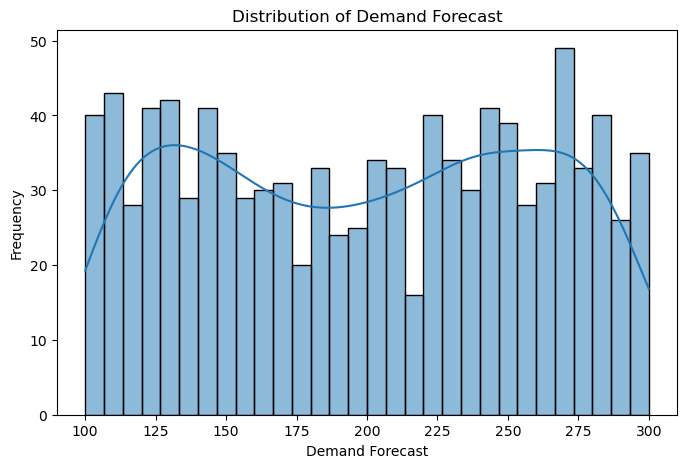

In [45]:
#1. Distribution of Demand Forecast
plt.figure(figsize = (8,5))
sns.histplot(df['Demand_Forecast'], bins = 30, kde = True)
plt.title('Distribution of Demand Forecast')
plt.xlabel('Demand Forecast')
plt.ylabel('Frequency')
plt.show()

In [68]:
# Basic descriptive statistics
desc = df['Demand_Forecast'].describe()

# Skewness
skew = df['Demand_Forecast'].skew()

# Percentage of values between 150 and 275
range_min, range_max = 150, 275
in_range_count = df[(df['Demand_Forecast'] >= range_min) & (df['Demand_Forecast'] <= range_max)].shape[0]
total = df.shape[0]
in_range_pct = (in_range_count / total) * 100

# Display results
print("Demand Forecast Summary:")
print(f"Count           : {desc['count']}")
print(f"Mean            : {desc['mean']:.2f}")
print(f"Median (50%)    : {desc['50%']:.2f}")
print(f"Std Deviation   : {desc['std']:.2f}")
print(f"Min             : {desc['min']}")
print(f"25th Percentile : {desc['25%']}")
print(f"75th Percentile : {desc['75%']}")
print(f"Max             : {desc['max']}")
print(f"Skewness        : {skew:.4f}")
print(f"% between {range_min} and {range_max}: {in_range_pct:.1f}%")


Demand Forecast Summary:
Count           : 1000.0
Mean            : 199.28
Median (50%)    : 202.00
Std Deviation   : 59.92
Min             : 100.0
25th Percentile : 144.0
75th Percentile : 251.25
Max             : 300.0
Skewness        : -0.0168
% between 150 and 275: 59.5%


### Distribution of Demand Forecast
- Most demand forecast values fall between **150 and 275 units**, covering nearly **60%** of the dataset.
- The average demand is around **199**, and the **median is 202**, suggesting a balanced, symmetric distribution.
- There is **no significant skew**, indicating consistent forecasting behavior without extreme bias.
- This range gives us a reliable **baseline expectation** when building demand forecasting models.


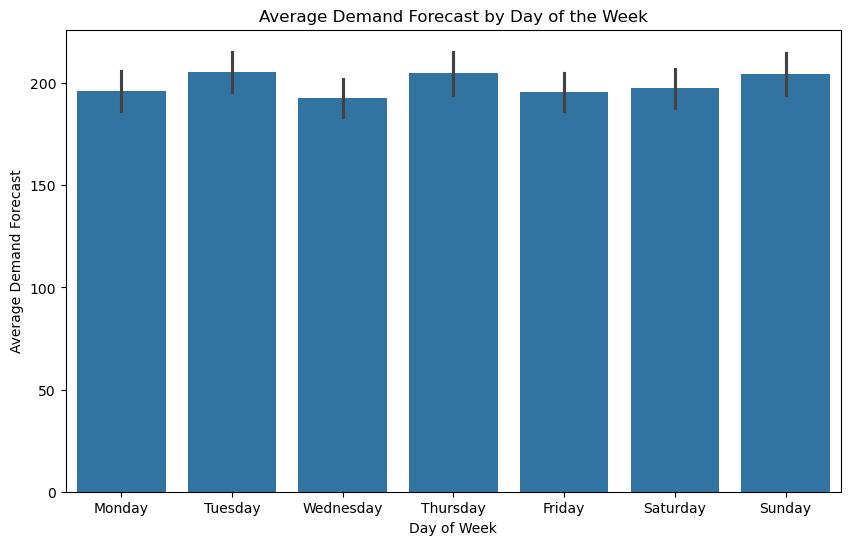

In [51]:
#2. Average Demand Forecast by Day fo the Week
plt.figure(figsize = (10, 6))
sns.barplot (
    x =  'DayOfWeek',
    y = 'Demand_Forecast',
    data = df,
    estimator = np.mean,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.title ('Average Demand Forecast by Day of the Week')
plt.xlabel ('Day of Week')
plt.ylabel ('Average Demand Forecast')
plt.show()

### Average Demand by Day of the Week Insight
- **Tuesday**, **Thursday**, and **Sunday** show the highest average demand.
- Day of the Week should be part of the features to include as a predictive feature in our demand forecasting model
- Businesses could schedule restocking or promotions based on these patterns.

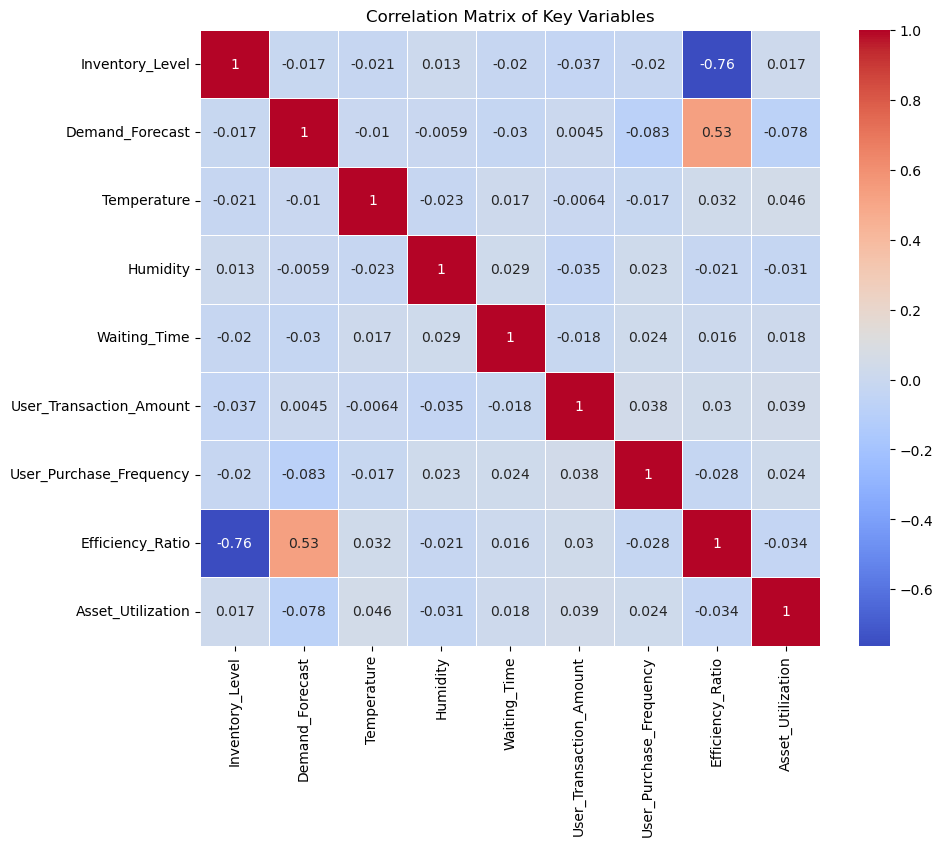

In [57]:
#3. Correlation Matrix Heatmap
plt.figure(figsize = (10,8))
corr = df [['Inventory_Level', 'Demand_Forecast', 'Temperature', 'Humidity',
           'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency',
           'Efficiency_Ratio', 'Asset_Utilization']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()

### Correlation Insights
- The only field that correlates positively and moderately with 'Demand_Forecasting' is 'Efficiency_Ratio' with a value of 0.53
- All other variables show very weak or no correlation at all with 'Deman_Forecasting'
- This shows an amazing fact that variables such as 'Weather' or 'Inventory' are not directly tied to  **demand**
- **Efficiency Ratio** is more relevant and should be prioritized in future modelling efforts.